In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_theme('paper')
sns.set_style('white')

In [12]:
movies_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movie_cast_AND_dummy_vars.csv'
movies = pd.read_csv(movies_path, index_col=0)
print(movies.shape)
movies.head(2)

(3540, 42)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,is_News,is_Musical,is_Drama,is_Biography,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,False,False,False,False,False,False,False,False,False,False
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,False,False,False,False,False,False,False,False,False,True


In [13]:
movies_exp = movies.assign(genres_sep=movies['genres'].str.split(',')).explode('genres_sep')
movies_exp.shape

(9124, 43)

In [14]:
all_movies_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movies_00_19.csv'
all_movies = pd.read_csv(all_movies_path)
print(all_movies.shape)
all_movies.head(2)

(224052, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance"


In [15]:
all_movies_exp = all_movies.assign(genres_sep=all_movies['genres'].str.split(',')).explode('genres_sep')
all_movies_exp.shape

(353696, 10)

In [16]:
x = movies_exp.genres_sep.value_counts().index
y = list(all_movies_exp.genres_sep.value_counts()[x].values)

In [17]:
all_movies_values = np.arange(0, 90000, 10000)
all_movies_labels = [f'{value:,}' for value in all_movies_values]

In [20]:
movies_exp.genres_sep.value_counts()

Drama          1884
Comedy         1252
Action          993
Crime           705
Thriller        641
Romance         626
Adventure       625
Horror          443
Mystery         397
Fantasy         310
Sci-Fi          302
Biography       294
Family          207
History         124
Music           114
Sport            84
War              44
Musical          30
Documentary      25
Western          22
News              2
Name: genres_sep, dtype: int64

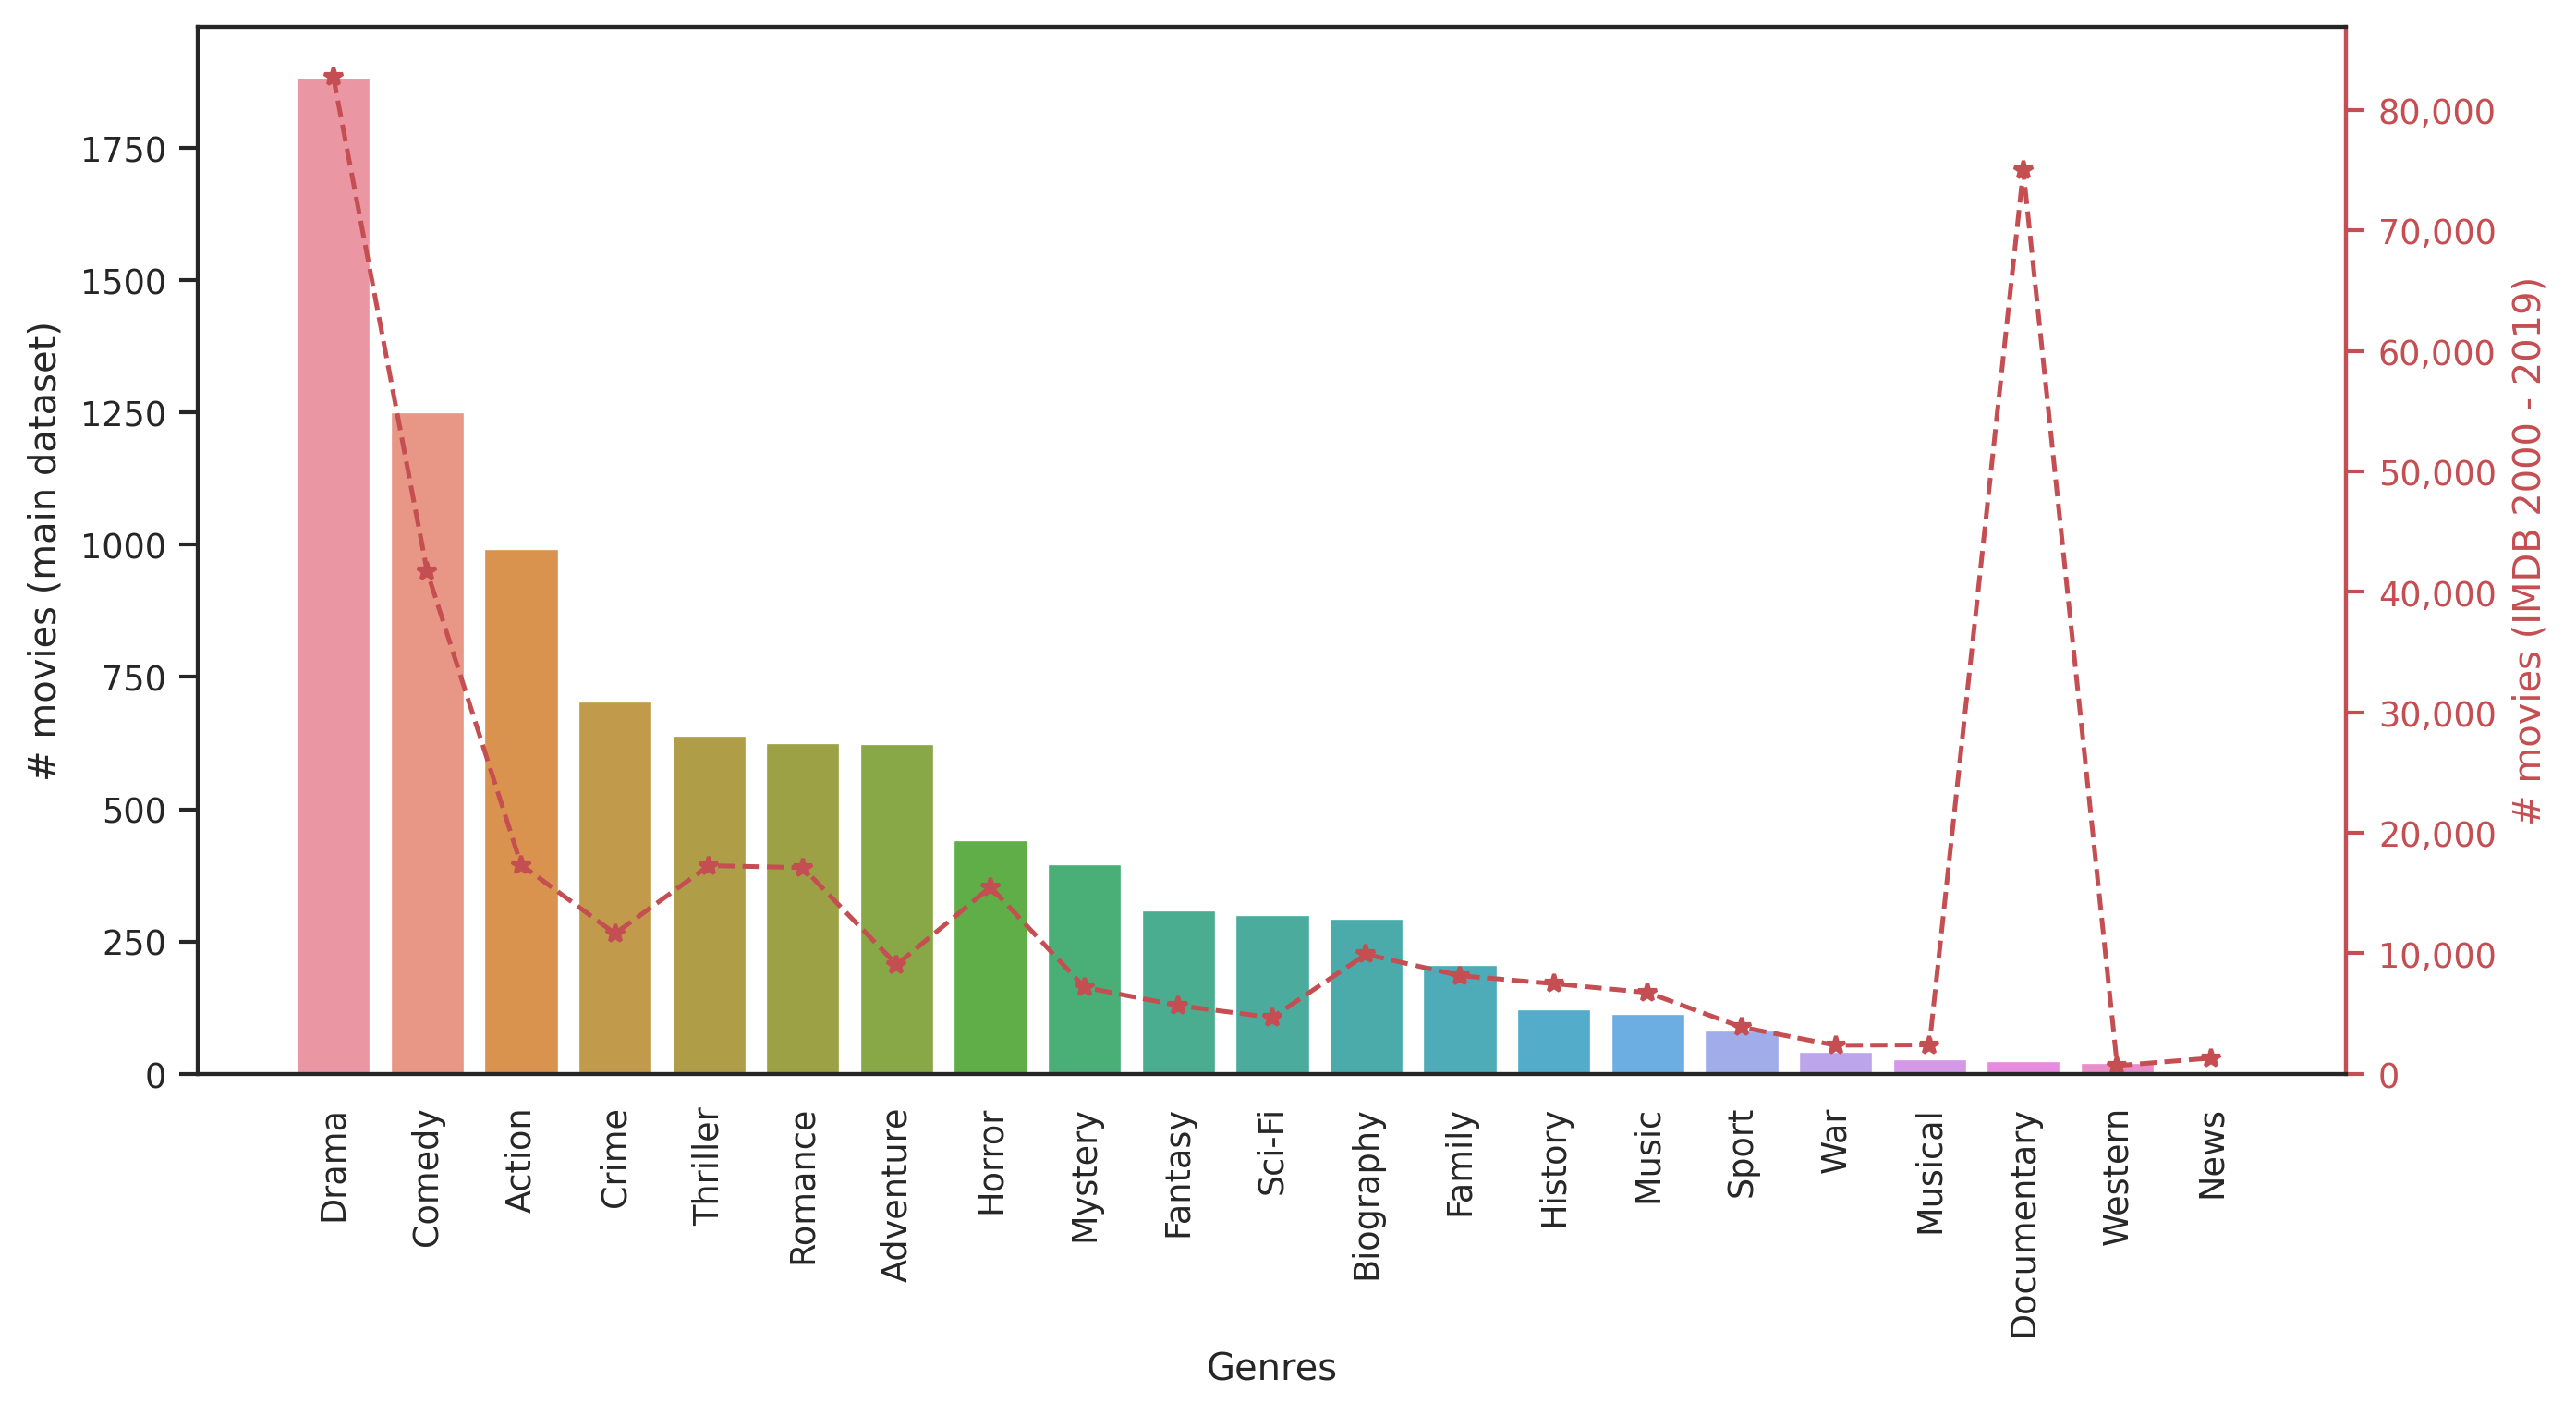

In [18]:
f, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax = sns.countplot(data=movies_exp, x='genres_sep', order=movies_exp.genres_sep.value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Genres')
ax.set_ylabel('# movies (main dataset)')

ax2 = ax.twinx()
ax2.plot(x, y, 'r--*')
ax2.spines['right'].set_color('r')
ax2.tick_params(axis='y', colors='r')
ax2.set_yticks(all_movies_values)
ax2.set_yticklabels(all_movies_labels)
ax2.set_ylabel('# movies (IMDB 2000 - 2019)', color='r')
ax2.set_ylim(bottom=0)

plt.show()

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
from scipy.stats import chisquare, chi2_contingency

In [ ]:
# chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 10, 16, 14, 1, 18])

In [ ]:
obs = np.array([[10, 10, 10], [20, 20, 20]])
chi2_contingency(obs)

(0.0, 1.0, 2, array([[10., 10., 10.],
        [20., 20., 20.]]))

In [ ]:
chi2_contingency(np.vstack([obs[0], obs[0] + 3]))

(0.0, 1.0, 2, array([[10., 10., 10.],
        [13., 13., 13.]]))

In [ ]:
obs.shape, obs

((2, 3), array([[10, 10, 10],
        [20, 20, 20]]))

In [ ]:
movies_exp.shape, all_movies_exp.shape

((9124, 43), (353696, 10))

In [ ]:
count_df = pd.DataFrame(movies_exp.genres_sep.value_counts())
print(count_df.shape)
count_df

(21, 1)


,genres_sep
Drama,1884
Comedy,1252
Action,993
Crime,705
Thriller,641
Romance,626
Adventure,625
Horror,443
Mystery,397
Fantasy,310


In [ ]:
all_count = pd.DataFrame(all_movies_exp.genres_sep.value_counts())
print(all_count.shape)
all_count

(27, 1)


,genres_sep
Drama,82766
Documentary,74965
Comedy,41678
Action,17348
Thriller,17275
Romance,17110
Horror,15502
Crime,11645
Biography,9915
Adventure,9056


In [ ]:
# all_count = all_count[all_count['index'].isin(count_df.index)]
# all_count.shape

In [ ]:
all_count = all_count.reindex(count_df.index)

In [ ]:
genres0 = list(count_df.index)
genres1 = list(all_count.index)
for i in range(len(genres0)):
  print(genres0[i] == genres1[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
count_df['all_count'] = all_count['genres_sep']
count_df

,genres_sep,all_count
Drama,1884,82766
Comedy,1252,41678
Action,993,17348
Crime,705,11645
Thriller,641,17275
Romance,626,17110
Adventure,625,9056
Horror,443,15502
Mystery,397,7173
Fantasy,310,5665


In [ ]:
count_df = count_df.drop('Documentary')
count_df.shape

(20, 2)

In [ ]:
count_df = count_df.drop('News')

In [ ]:
count_df['prop'] = count_df['genres_sep'] / sum(count_df['genres_sep'])
count_df['prop_all'] = count_df['all_count'] / sum(count_df['all_count'])
count_df

,genres_sep,all_count,prop,prop_all
Drama,1884,82766,0.207101,0.304885
Comedy,1252,41678,0.137628,0.153529
Action,993,17348,0.109157,0.063905
Crime,705,11645,0.077498,0.042897
Thriller,641,17275,0.070463,0.063636
Romance,626,17110,0.068814,0.063028
Adventure,625,9056,0.068704,0.033360
Horror,443,15502,0.048697,0.057105
Mystery,397,7173,0.043641,0.026423
Fantasy,310,5665,0.034077,0.020868


In [ ]:
obs.shape, obs

((2, 3), array([[10, 10, 10],
        [20, 20, 20]]))

In [ ]:
obs[0].shape

(3,)

In [ ]:
count_df.genres_sep.values.shape

(19,)

In [ ]:
np.vstack([obs[0], obs[1]]) == obs

array([[ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
new_obs = np.vstack([count_df.genres_sep.values, count_df.all_count.values])
new_obs.shape

(2, 19)

In [ ]:
chi2_contingency(np.vstack([count_df[:3].genres_sep.values, count_df[:3].all_count.values]))

(559.0471719408337,
 4.022064688382501e-122,
 2,
 array([[ 2395.26764482,  1214.75298278,   518.9793724 ],
        [82254.73235518, 41715.24701722, 17822.0206276 ]]))

In [ ]:
movies_exp.head(2)

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,is_Musical,is_Drama,is_Biography,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,False,False,False,False,False,False,False,False,False,Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,False,False,False,False,False,False,False,False,False,Mystery


ValueError: ignored

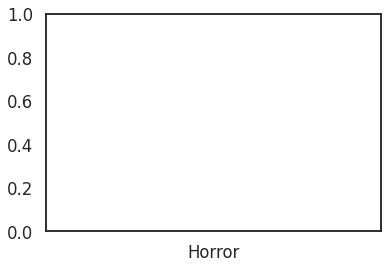

In [ ]:
sns.ecdfplot(data=movies_exp, x='genres_sep')